# Raphael Kaya ; Omar Chaouch

# Algorithmen in der Bioinformatik – Übungsblatt 8
## Abgabe: Freitag, 21.6., 10:30 Uhr

Die Abgabe ist mit bis zu 3 Personen möglich und kann auf Deutsch oder Englisch geschrieben sein. Es muss nur eine Person eines Teams abgeben, in diesem Fall müssen die Namen der Teammitglieder hier in diesem Jupyter Notebook ganz oben genannt werden.

Die praktischen Aufgaben sind mit Python3-Code zu lösen.

Laden Sie das bearbeitete Jupyter Notebook im ILIAS hoch.

**Hinweis:** Sie können eine Bilddatei in ihre Abgabe einbinden, indem Sie test.png durch den entsprechenden Dateinamen ersetzen:

In [2]:
# simple test() function to check function returns vs. what the function was supposed to return.
def test(got, expected):
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  X '
    print('%s got: %s expected: %s' % (prefix, repr(got), repr(expected)))

## Aufgabe 8.1 (8 Punkte, 4 + 4)

In dieser Aufgabe sollen Overlap-Graphen implementiert werden. Zur Visualisierung benötigen Sie die Python-Pakete `networkx`, `pygraphviz` und `matplotlib`. Diese sind beispielsweise über `pip` oder `conda` verfügbar. Nutzen Sie bei Problemen den Rocketchat, da sich technische Probleme dort vielleicht klären lassen.

(a) Implementieren Sie die Erstellung des Overlap-Graphen. Die Eingabe ist eine Liste von Reads (Strings) und eine Zahl $k$ für den minimalen Overlap, d. h., es sollen nur Kanten im Graph eingezeichnet werden, die einem Overlap von mindestens $k$ entsprechen.

Benutzen Sie [`networkx`](https://networkx.github.io), um Ihren Graphen zu erstellen. Die Funktion `olg` sollte einen [`DiGraph`](https://networkx.github.io/documentation/stable/reference/classes/digraph.html#networkx.DiGraph) zurückgeben, wobei die Knoten die Reads und die Kanten die Overlaps (mit Länge $\geq k$) repräsentieren. Die Kanten sollen mit Labels beschriftet sein, die den jeweiligen Overlap angeben. Das Resultat sollte in etwa so aussehen:

In [6]:
from IPython.display import Image
Image('olg_solution.jpg')

FileNotFoundError: No such file or directory: 'olg_solution.jpg'

FileNotFoundError: No such file or directory: 'olg_solution.jpg'

<IPython.core.display.Image object>

In [17]:
import itertools
import networkx
import numpy as np
import matplotlib.image as img
from IPython.display import Image

def overlap(x, y, k):
    for i in range(k, min(len(x), len(y)) + 1):
        if x[-i:] == y[:i]:
            return i
    return 0

def olg(reads, k):
    G = nx.Graph()
    for read in reads:
        G.add_node(read)
    for i in range(len(reads)):
        for j in range(len(reads)):
            if i != j:
                temp_overlap = overlap(reads[i], reads[j], k)
                if temp_overlap >= k:
                    G.add_edge(reads[i], reads[j], weight=temp_overlap)
    return G

string = 'to_every_thing_turn_turn_turn_there_is_a_season'
reads = [string[i:i+7] for i in range(len(string)-6)]
graph_raw = olg(reads, 4)

# saves graph as jpg file
A = networkx.nx_agraph.to_agraph(graph_raw)
A.draw('olg.jpg', prog='dot')

# rotate image
olg_image = np.rot90(img.imread('olg.jpg'))
img.imsave('olg.jpg', olg_image)

# display image
Image('olg.jpg')


ModuleNotFoundError: No module named 'networkx'

(b) Sei $o(x, y)$ die Länge des längsten Overlaps zwischen zwei Strings $x$ und $y$. Seien $x, y, z$ drei Strings (bzw. Knoten) der Länge $k$ eines Overlap-Graphen $G = (V, E)$. Wir nennen die Kante $(x, z) \in E$ transitiv, falls $(x, y), (y, z) \in E$ und falls $k - o(x, z) = k - o(x, y) + k - o(y, z)$.

Implementieren Sie die unten stehende Funktion, die alle transitiven Kanten aus dem in Teil (a) berechneten Graphen entfernt. Der resultierende Graph sollte in etwa so aussehen:

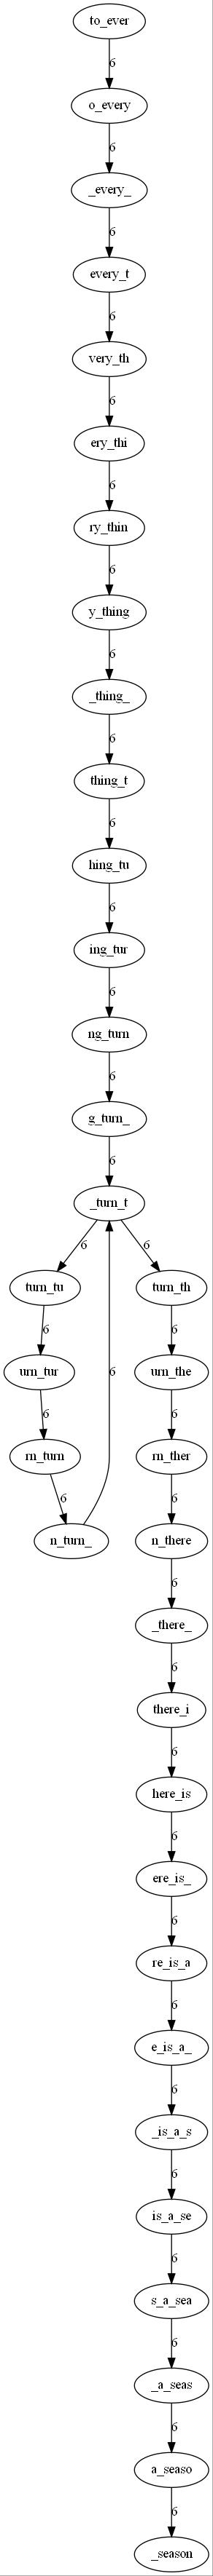

In [ ]:
from IPython.display import Image
Image('olg_reduced_solution.jpg')

In [18]:
def reduce_trans(graph):
    graphcopy = graph.copy()
    
    for x in graph.nodes():
        for y in graph.nodes():
            for z in graph.nodes():
                if x == y or x == z or y == z:
                    continue
                if graph.has_edge(x, y) and graph.has_edge(y, z):
                    o_x_y = k - graph[x][y]['label']
                    o_y_z = k - graph[y][z]['label']
                    if graph.has_edge(x, z):
                        o_x_z = k - graph[x][z]['label']
                        if k - o_x_z == o_x_y + o_y_z:
                            graphcopy.remove_edge(x, z)
        
    
    
    return graphcopy

graph_reduced = reduce_trans(graph_raw)

# saves graph as jpg file
A = networkx.nx_agraph.to_agraph(graph_reduced)
A.draw('olg_reduced.jpg', prog='dot')

# rotate image
olg_image = np.rot90(img.imread('olg_reduced.jpg'))
img.imsave('olg_reduced.jpg', olg_image)

# display image
Image('olg_reduced.jpg')

NameError: name 'graph_raw' is not defined

## Aufgabe 8.2 (6 Punkte, 4 + 2)

(a) Konstruieren Sie einen De-Bruijn-Graphen über $s$ = `AAATTCTAATTCTACACTA`, wobei die Kanten durch 3-mere und die Knoten 2-mere präsentieren sollen.

(b) Geben Sie alle verschiedenen Eulerpfade in diesem De-Bruijn-Graphen an.

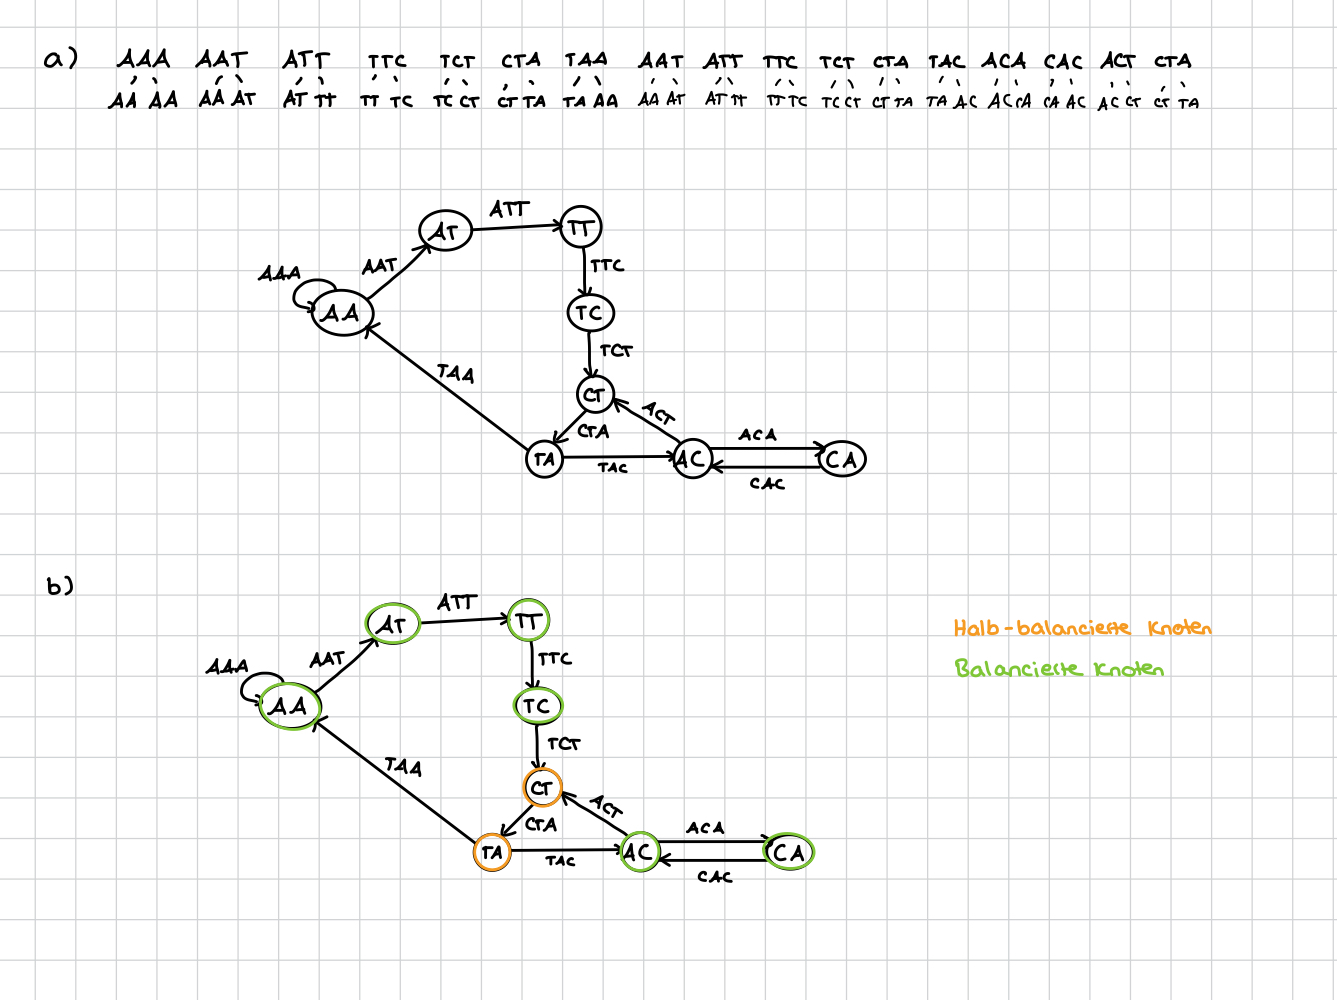

In [ ]:
from IPython.display import Image
Image('Bruijn.jpeg')

(b) 

Pfade: 

(TA als Anfang, da 1 Ausgang mehr, als Eingang, CT als Eingang, da 1 Eingang mehr als Ausgang)

Pfad 1: TA -> AA -> AT -> TT -> TC -> CT -> TA -> AC -> CA -> AC -> CT

Pfad 2: TA -> AC -> CA -> AC -> CT -> TA -> AA -> AT -> TT -> TC -> CT

## Aufgabe 8.3 (6 Punkte, 4 + 2)

Assembly durch einen De-Bruijn-Graphen (DBG) setzt voraus, dass dieser einen Eulerpfad enthält. In der Praxis enthalten Reads jedoch Sequenzierfehler, sodass auch die $k$-mere für den DBG fehlerhaft sind. Wir nehmen an, dass ein fehlerhaftes $k$-mer dazu führt, dass dem DBG eine Kante fehlt (die des eigentlichen $k$-mers) und er dafür eine andere Kante zu viel hat (die des fehlerhaften $k$-meres). Dies wiederum kann dazu führen, dass der DGB keinen Eulerpfad mehr enthält.

(a) Beschreiben Sie, wie man für einen gegebenen DBG eine untere Schranke für die Anzahl an fehlerhaften $k$-meren bestimmen kann.

(b) Ein häufiger Sequenzierfehler ist der sogenannte **Single Nucleotid Polymorphism** (SNP), bei dem eine Base eines $k$-mers durch eine andere ersetzt wurde. Die durch ein fehlerhaftes $k$-mer überschüssige Kante hat also eine Hamming-Distanz von genau 1 zu der eigentlich korrekten Kante, die nun im Graphen fehlt.

Angenommen, es kommt ausschließlich diese Art von Sequenzierfehler vor. Basierend auf dem Alphabet $\Sigma = \{A, C, G, T\}$, wie viele verschiedene fehlerhafte $k$-mere gibt es, die beim Sequenzieren eines $k$-mers ausgegeben werden könnten?

## Antwort

(a) 
Untere Schranke: Die Untere Schranke an fehlerhaften k-meren müsste mindestens die Hälfte aller Knoten, mit ungleicher Anzahl an Eingängen und Ausgängen - 2 sein. Die '- 2' ist dabei, da der Anfangs und Endknoten in einem Eulerpfad halb-balanciert sind, deshalb können diese außenvor gelassen werden. Die Hälfte, da durch ein fehlerhaftes k-mer, zwei Knoten beeinflusst werden. Nämlich, ein Knoten, der eine richtige Kante entfernt bekommt und ein Knoten, der eine falsche Kante hinzugefügt bekommt. Deshalb ist die untere Schranke mind. die Hälfte aller Knoten mit unterschiedlichen Ausgängen, wie Eingängen (abgesehen von den beiden halb-balancierten Knoten, die per Definition relevant sind).

[#Nur zur Überlegung: 
Obere Schranke: Wenn durch falsche k-mere der Graph unterbrochen wird, entsteht ein Graph, der nicht mehr Eulersch ist. Dies gilt es also zu vermeiden.

Knoten können mehrere Eingänge und Ausgänge, teilweise auch auf denselben Knoten haben. Diese doppelten (oder dreifachen, vierfachen,...) entstandenen Verbindungen zwischen zwei Knoten stellen das maximale an falschen k-meren da. Denn solange weiterhin eine der multiplen Verbindungen zwischen zwei richtigen Knoten bestehen bleibt und der richtige Graph bestehen bleibt, bleibt er auch Eulersch. Anzahl falscher k-mere darf also max. gleich der Anzahl zu vieler Verbindungen zwischen zwei Knoten sein. Dabei kann es beliebig viele Knoten geben, die vielfache gemeinsame Verbindungen haben. Wichtig dabei aber auch: es dürfen nicht zu viele falsche k-mere dazukommen, dass die Anzahl der halb-balancierten Knoten größer zwei ist. Demnach müssen falsche k-mere auch Ausgänge haben, falls durch das falsche k-mer sonst die Anzahl der halb-balancierten Knoten größer zwei wäre.]

(b) Wenn eine Base immer nur durch eine der anderen Basen ersetzt werden kann / falsch sequenziert werden kann, dann gibt es k * 3 mögliche falsche k-mere. Denn, es gibt bei jedem k-mer k Stellen, bei welchen ein SNP auftreten kann. Also k Stellen, bei dem eine Base durch eine der anderen drei ausgetauscht werden kann, wodurch k*3 mögliche Sequenzen entstehen können.